<a href="https://colab.research.google.com/github/Guenole-tech/Lorentz-IA/blob/main/Quantique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install myqlm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.2/833.2 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.5/648.5 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.0/661.0 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.6/285.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.0/911.0 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 742.5/742.5 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.0 MB/s eta 0:00:00
   ━━━━

In [ ]:
!python -m qat.magics.install

QLM magics have been sucessfully installed


La classe Program permet de creer des circuits, d'appliquer des portes et d'allouer des qubits

In [ ]:
from qat.lang.AQASM import Program

prog = Program()

La methodes qalloc de la methode Program permet d'allouer des qubits

In [ ]:
qbits = prog.qalloc(8)

Les portes quantiques sont des methodes ou fonctions dans la bibliothèque qat.lang.AQASM

Elles sont appliquées par la methode apply de Program: en entrée elle prends la porte et le qubit sur lequel on applique

In [ ]:
from qat.lang.AQASM import H, X, CNOT, PH
from math import pi

prog.apply(H, qbits[0])
prog.apply(X, qbits[1])
prog.apply(CNOT, qbits[1], qbits[5])
prog.apply(PH(pi/6), qbits[5])

La methode to_circ est destinée pour realiser des circuits quantiques


In [ ]:
circ = prog.to_circ()

In [ ]:
circ.display()

Initial state of the system
|00000000> (1+0j)


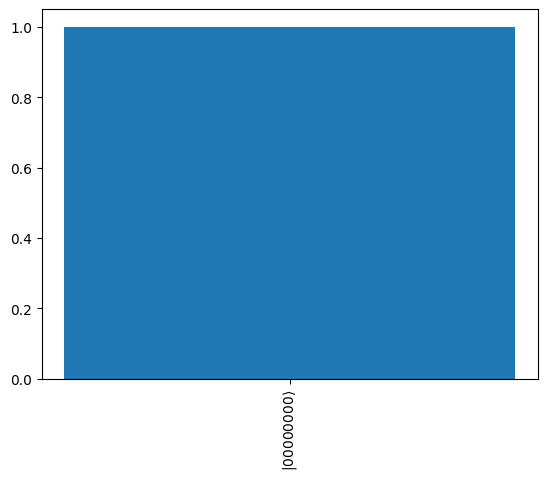


Final state
|01000000> (0.7071067811865475+0j)
|11000100> (0.6123724356957945+0.3535533905932737j)


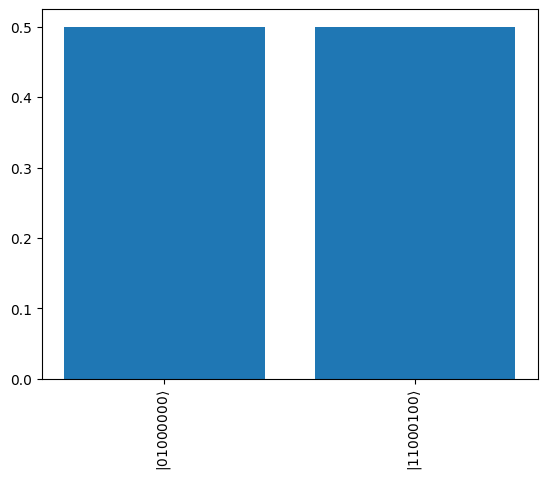

In [ ]:
from qat.qpus import get_default_qpu
qpu = get_default_qpu()
prog = Program()
qbits = prog.qalloc(8)
c_init=prog.to_circ()
job_init = c_init.to_job()
result_init = qpu.submit(job_init)
print("Initial state of the system")
for s in result_init:
    print(s.state, s.amplitude)
result_init.plot()


H(qbits[0])
X(qbits[1])
CNOT(qbits[0],qbits[5])
PH(pi/6)( qbits[5])
circ = prog.to_circ()
job_final= circ.to_job()
result_final = qpu.submit(job_final)
print("\nFinal state")
for s in result_final:
    print(s.state, s.amplitude)
result_final.plot()

In [ ]:
from qat.lang.AQASM import Program
from qat.lang.AQASM import H, RY
from math import pi
prog = Program()
qbit = prog.qalloc(1)
# Here you can change the initial state (|0> by default)
RY(pi/3)(qbit)
c_init= prog.to_circ()
c_init.display()
job_init = c_init.to_job()
result_init = qpu.submit(job_init)
print("Initial state of the system")
for s in result_init:
    print(s.state, s.amplitude)
# Apply gate H
H(qbit)
c_h= prog.to_circ()
c_h.display()
job_h = c_h.to_job()
result_h = qpu.submit(job_h)
print("State of the system after gate H")
for s in result_h:
    print(s.state, s.amplitude)
# Apply gate H again
H(qbit)
c_h2= prog.to_circ()
c_h2.display()
job_h2 = c_h2.to_job()
result_h2 = qpu.submit(job_h2)
print("State of the system after gate H twice")
for s in result_h2:
    print(s.state, s.amplitude)


Initial state of the system
|0> (0.8660254037844387+0j)
|1> (0.49999999999999994+0j)


State of the system after gate H
|0> (0.9659258262890682+0j)
|1> (0.2588190451025208+0j)


State of the system after gate H twice
|0> (0.8660254037844385+0j)
|1> (0.4999999999999999+0j)


In [ ]:
from qat.lang.AQASM import Program
from qat.lang.AQASM import H, CNOT
from math import pi
prog = Program()
b = prog.qalloc(2)
# the Bell states are the image of (q0,q1) in the computational basis  with the circuit
# H(q0)
# CNOT(q0,q1)
#
# b =|00>
circ= prog.to_circ()
job = circ.to_job()
result= qpu.submit(job)
print("Computationnal state")
for s in result:
    print(s.state, s.amplitude)
H(b[0])
CNOT(b[0],b[1])
circ= prog.to_circ()
job = circ.to_job()
result = qpu.submit(job)
print("Bell state")
for s in result:
    print(s.state, s.amplitude)

#
# b=|01>
prog = Program()
b = prog.qalloc(2)
X(b[1])
circ= prog.to_circ()
job = circ.to_job()
result= qpu.submit(job)
print("Computationnal state")
for s in result:
    print(s.state, s.amplitude)
H(b[0])
CNOT(b[0],b[1])
circ= prog.to_circ()
job = circ.to_job()
result = qpu.submit(job)
print("Bell state")
for s in result:
    print(s.state, s.amplitude)

# b=|10>
prog = Program()
b = prog.qalloc(2)
X(b[0])
circ= prog.to_circ()
job = circ.to_job()
result= qpu.submit(job)
print("Computationnal state")
for s in result:
    print(s.state, s.amplitude)
H(b[0])
CNOT(b[0],b[1])
circ= prog.to_circ()
job = circ.to_job()
result = qpu.submit(job)
print("Bell state")
for s in result:
    print(s.state, s.amplitude)

# b=|11>
prog = Program()
b = prog.qalloc(2)
X(b[0])
X(b[1])
circ= prog.to_circ()
job = circ.to_job()
result= qpu.submit(job)
print("Computationnal state")
for s in result:
    print(s.state, s.amplitude)
H(b[0])
CNOT(b[0],b[1])
circ= prog.to_circ()
job = circ.to_job()
result = qpu.submit(job)
print("Bell state")
for s in result:
    print(s.state, s.amplitude)

#inverse Bell transform
CNOT(b[0],b[1])
H(b[0])
circ= prog.to_circ()
job = circ.to_job()
result = qpu.submit(job)
print("Back to computationnal basis state")
for s in result:
    print(s.state, s.amplitude)




Computationnal state
|00> (1+0j)
Bell state
|00> (0.7071067811865475+0j)
|11> (0.7071067811865475+0j)
Computationnal state
|01> (1+0j)
Bell state
|01> (0.7071067811865475+0j)
|10> (0.7071067811865475+0j)
Computationnal state
|10> (1+0j)
Bell state
|00> (0.7071067811865475+0j)
|11> (-0.7071067811865475+0j)
Computationnal state
|11> (1+0j)
Bell state
|01> (0.7071067811865475+0j)
|10> (-0.7071067811865475+0j)
Back to computationnal basis state
|11> (0.9999999999999998+0j)


In [ ]:
from qat.lang.AQASM import Program
from qat.lang.AQASM import H, Z,X, CNOT
from math import pi
qpu = get_default_qpu()
prog = Program()
b = prog.qalloc(2)
# the Bell states are the image of (q0,q1) in the computational basis  with the circuit
# H(q0)
# CNOT(q0,q1)
#
# b =|00>
H(b[0])
CNOT(b[0],b[1])
circ= prog.to_circ()
job = circ.to_job()
result1 = qpu.submit(job)
print("Initial AB pair state")
for s in result1:
    print(s.state, s.amplitude)
#
#
# Easy case: Alice wants to encore 00 she does nothing
#
# Alice wants to transmit 11
# She  applies X followed by Z (or ZX) to encode 11.
#X(b[1])
#Z(b[1])
# Alice wants to transmit 01
# She  applies  Apply X (bit flip) to encode 01.
#X(b[1])
# Alice wants to transmit 10
# She  applies  Apply Z (phase flip) to encode 10.
prog = Program()
b = prog.qalloc(2)
c=  prog.calloc(2)

prog.apply(H,b[0])
prog.apply(CNOT,b[0],b[1])

prog.apply(Z,b[1])

# Step 2: Bob decodes the qubits
prog.apply(CNOT, b[0], b[1])     # Apply CNOT again for decoding
prog.apply(H, b[0])              # Apply Hadamard to decode

# Step 3: Measure both qubits to get the classical bits
circ = prog.to_circ()
#prog.measure(b,c)
#prog.measure(b[1],c[1])

# Compile and run the program
job = circ.to_job()
result = qpu.submit(job)

# Print the result
for sample in result:
    print("Classical bits received:", sample.state)
    print(sample)

Initial AB pair state
|00> (0.7071067811865475+0j)
|11> (0.7071067811865475+0j)
Classical bits received: |10>
Sample(_amplitude=ComplexNumber(re=0.9999999999999998, im=0.0), probability=0.9999999999999996, _state=b'\x02', err=None, intermediate_measurements=None, qregs=[QRegister(scope=<qat.lang.AQASM.program.Program object at 0x7e6e76fc7470>, length=2, start=0, msb=None, _subtype_metadata=None, qbits=[<qat.lang.AQASM.bits.Qbit object at 0x7e6e76fc6720>, <qat.lang.AQASM.bits.Qbit object at 0x7e6e76fc7980>])])


In [ ]:
from qat.lang.AQASM import Program
from qat.lang.AQASM import H, Z,X, CNOT,RZ,RY,RX
from math import pi
import random
import numpy
qpu = get_default_qpu()
prog = Program()
psi=prog.qalloc(1)
b = prog.qalloc(2)
M=prog.calloc(2)
# prepare unknown state phi =|->
angles = [random.random() * 2. * numpy.pi for _ in range(3)]
prog.apply(RZ(angles[0]),psi)
prog.apply(RX(angles[1]), psi)
prog.apply(RZ(angles[2]), psi)

circ= prog.to_circ()
job = circ.to_job()
result = qpu.submit(job)
print("Initial psi and AB pair state")
for s in result:
    print(s.state, s.amplitude,s.probability)

# b =|00>
H(b[0])
CNOT(b[0],b[1])
# now AB pair b is entangled
"""circ= prog.to_circ()
job = circ.to_job()
result = qpu.submit(job)
print("Initial psi and AB pair state")
for s in result:
    print(s.state, s.amplitude)
#"""
# Alice entangles psi with her qbit b[0]
CNOT(psi,b[0])
H(psi)
# Alice measures psi and her qbit in 2 classical bits
prog.measure(psi,M[0])
prog.measure(b[0],M[1])
"""circ= prog.to_circ()
job = circ.to_job()
result = qpu.submit(job)
print("intermediate psi and AB pair state")
for s in result:
    print(s.state, s.amplitude)"""
# Bob receives M and apply conditionnal gates to his qbit
prog.cc_apply(M[1], X, b[1])
prog.cc_apply(M[0], Z, b[1])

circ= prog.to_circ()
#job = circ.to_job()
# and
job = circ.to_job(nbshots=5000)
result = qpu.submit(job)

print("Bob' qubit final state")
"""for s in result:
    print(s.state, s.amplitude)
    print(s,s.state[1])
    print(type(s.state),type(s.state[1]))"""
p0=0
p1=0
for s in result:
    if s.state[2]:
        p1+=s.probability
    else:
        p0+=s.probability
print('p0=',p0)
print('p1=',p1)

Initial psi and AB pair state
|0>|00> (0.7364559602149692-0.6343055722184988j) 0.9447109402835895
|1>|00> (-0.20459074701691585+0.11589515068142744j) 0.05528905971641043
Bob' qubit final state
p0= 0.9458
p1= 0.054200000000000005
